In [ ]:
# Importing necessary libraries for EDA

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


import string

import nltk

from nltk.corpus import stopwords

from wordcloud import WordCloud

nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping, ReduceLROnPlateau


import warnings

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_2.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
ham_msg = data[data['Category'] == 'ham']

spam_msg = data[data['Category'] == 'spam']

ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

Text(0.5, 0, 'Message types')

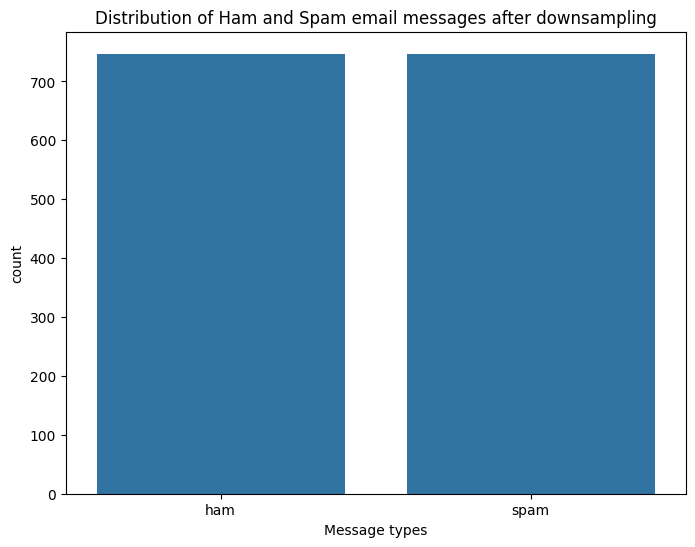

In [ ]:
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True)
plt.figure(figsize=(8, 6))

sns.countplot(data = balanced_data, x='Category')

plt.title('Distribution of Ham and Spam email messages after downsampling')

plt.xlabel('Message types')

In [ ]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1494 non-null   object
 1   Message   1494 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


In [ ]:
balanced_data.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
balanced_data['Message'] = balanced_data['Message'].str.replace('Subject', '')
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then i'll go home ...
1,ham,"I.ll always be there, even if its just in spir..."
2,ham,"Sorry that took so long, omw now"
3,ham,I thk 50 shd be ok he said plus minus 10.. Did...
4,ham,Dunno i juz askin cos i got a card got 20% off...


from matplotlib import pyplot as plt
_df_3['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Message')):
  _plot_series(series, series_name, i)
  fig.legend(title='Message', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Message'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Message', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
punctuations_list = string.punctuation

def remove_punctuations(Message):

    temp = str.maketrans('', '', punctuations_list)

    return Message.translate(temp)


balanced_data['Message']= balanced_data['Message'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Category,Message
0,ham,If i not meeting ü all rite then ill go home l...
1,ham,Ill always be there even if its just in spirit...
2,ham,Sorry that took so long omw now
3,ham,I thk 50 shd be ok he said plus minus 10 Did ü...
4,ham,Dunno i juz askin cos i got a card got 20 off ...


from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Message')):
  _plot_series(series, series_name, i)
  fig.legend(title='Message', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Message'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Message', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from tkinter import Message
def remove_stopwords(Message):

    stop_words = stopwords.words('english')


    imp_words = []


    # Storing the important words

    for word in str(Message).split():

        word = word.lower()


        if word not in stop_words:

            imp_words.append(word)


    output = " ".join(imp_words)


    return output



balanced_data['Message'] = balanced_data['Message'].apply(lambda text: remove_stopwords(Message))
balanced_data.head()

,Category,Message
0,ham,<class 'tkinter.message'>
1,ham,<class 'tkinter.message'>
2,ham,<class 'tkinter.message'>
3,ham,<class 'tkinter.message'>
4,ham,<class 'tkinter.message'>


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Category'] = encoder.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['Category'].value_counts()


Category
0    4825
1     747
Name: count, dtype: int64

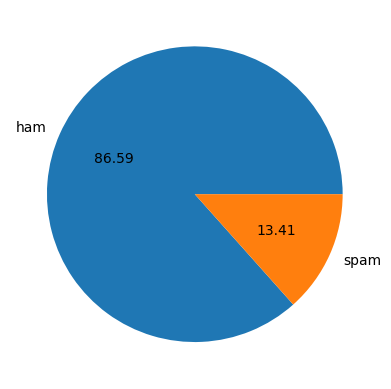

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_characters'] = data['Message'].apply(len)
data.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


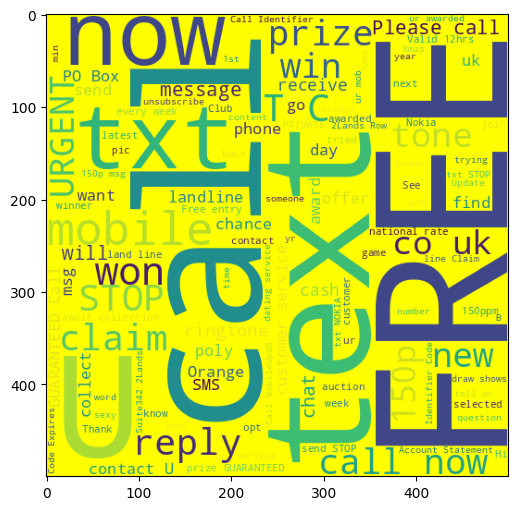

In [ ]:
import wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='yellow')
spam_wc = wc.generate(" ".join(data[data['Category'] == 1]['Message']))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
import pandas as pd
if not isinstance(data, pd.DataFrame):
    raise TypeError("'data' must be a Pandas DataFrame")
    if 'spam' not in data.columns:
      raise KeyError("'spam' column not found in the DataFrame")
train_X, test_X, train_Y, test_Y = train_test_split(data['Message'],

                                                    data['Category'],

                                                    test_size = 0.2,

                                                    random_state = 42)


In [ ]:
print(f"Train set size: {len(train_X)}")
print(f"Test set size: {len(test_X)}")
print(f"Train labels size: {len(train_Y)}")
print(f"Test labels size: {len(test_Y)}")

Train set size: 4457
Test set size: 1115
Train labels size: 4457
Test labels size: 1115


<Axes: xlabel='num_characters', ylabel='Count'>

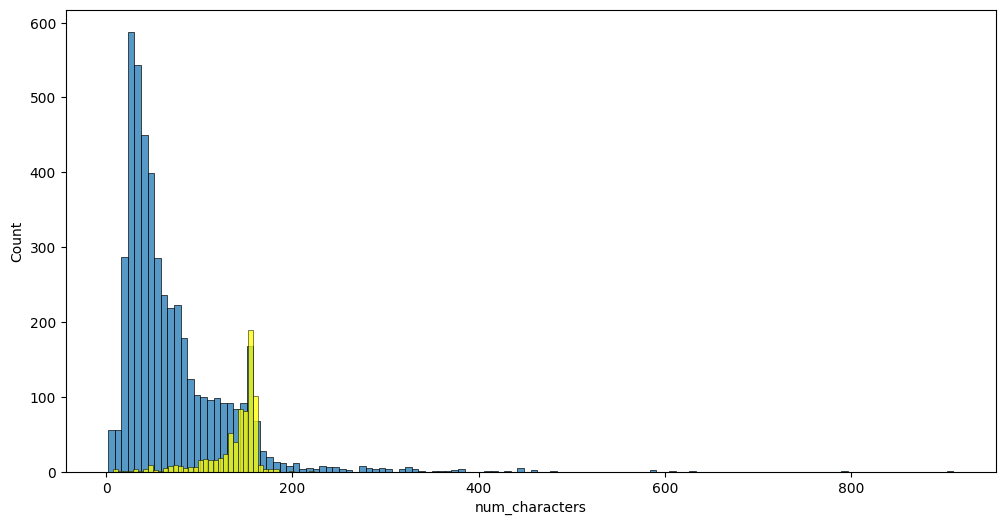

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data['Category'] == 0]['num_characters'])
sns.histplot(data[data['Category'] == 1]['num_characters'],color='yellow')

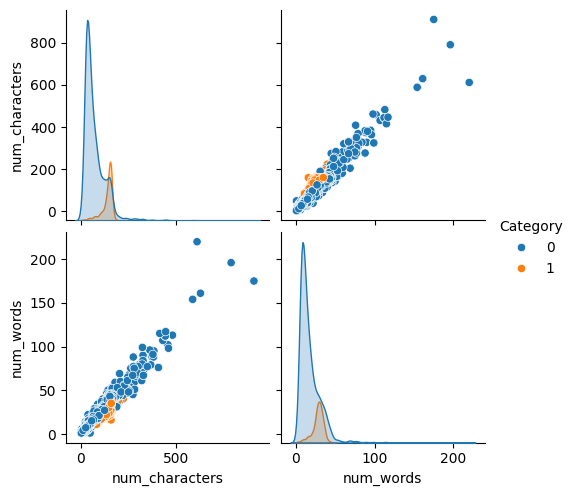

In [ ]:
sns.pairplot(data,hue='Category')

In [ ]:
# Build the model

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenize the text data

tokenizer = Tokenizer()
max_len = 100  # Replace with the actual maximum length of your sequences

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,

                                    output_dim=32,

                                    input_length=max_len))

model.add(tf.keras.layers.LSTM(16))

model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32        
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3745 (14.63 KB)
Trainable params: 3745 (14.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),

              metrics = ['accuracy'],

              optimizer = 'adam')
es = EarlyStopping(patience=3,

                   monitor = 'val_accuracy',

                   restore_best_weights = True)


lr = ReduceLROnPlateau(patience = 2,

                       monitor = 'val_loss',

                       factor = 0.5,

                       verbose = 0)



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
print(globals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "# Build the model\n\nimport tensorflow as tf\n\nfrom tensorflow.keras.preprocessing.text import Tokenizer\n\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\n\nmodel = tf.keras.models.Sequential()\n\nmodel.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,\n\n                                    output_dim=32, \n\n                                    input_length=max_len))\n\nmodel.add(tf.keras.layers.LSTM(16))\n\nmodel.add(tf.keras.layers.Dense(32, activation='relu'))\n\nmodel.add(tf.keras.layers.Dense(1, activation='sigmoid'))\n \n# Print the model summary\nmodel.summary()", "# Build the model\n\nimport tensorflow as tf\n\nfrom tensorflow.keras.preprocessing.text import Tokenizer\n\

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
!pip install xgboost

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
print(len(clfs.keys()))
print(len(accuracy_scores))
print(len(precision_scores))

11
0
0


In [ ]:
# Find the minimum length of the arrays
min_length = min(len(clfs.keys()), len(accuracy_scores), len(precision_scores))

# Convert the dictionary keys to a list
clfs_list = list(clfs.keys())

# Slice the arrays to the same length
clfs_sliced = clfs_list[:min_length]
accuracy_scores_sliced = accuracy_scores[:min_length]
precision_scores_sliced = precision_scores[:min_length]

# Create the DataFrame
performance_df = pd.DataFrame({'Algorithm':clfs_sliced,'Accuracy':accuracy_scores_sliced,'Precision':precision_scores_sliced}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
